# Homework 6 (solution)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

## Chapter 10, Exercise 28

We have discussed in this chapter that it is sometimes difficult to distinguish E$_2$ and E$_1$cB mechanisms by examining kinetics, isotope effects, and leaving group effects. An extremely ingenious method to distinguish these possibilities takes into account the relative rates of elimination in $\mathrm{H_2O}$ and $\mathrm{D_2O}$ as a function of the concentration of the base in a buffer. Examine the plot given for the elimination reaction shown. As one increases the base concentration (AcNHO$^-$ is acetoxyhydroxamate)
in a buffer, keeping the pH constant, the kobs levels off faster in $\mathrm{H_2O}$ than in $\mathrm{D_2O}$, yet the $k_{obs}$ in $\mathrm{D_2O}$ is also slowly leveling off. First, explain why this supports an E$_1$cB mechanism and not an E$_2$ mechanism. Second, explain why the $k_{obs}$ values for an E$_1$cB reaction would level off faster in $\mathrm{H_2O}$ than in $\mathrm{D_2O}$. (Hint: You will have to examine the relative sizes of the $k_{-1}$ and $k_2$ terms in the denominator of the rate expression in the two different solvents.)


![title](HW6-10.28.png)


*Solution:*

First, the rate for E$_2$ elimination mechanism would depend on both the reactant and base and observed pseudo-first order rate constant $k_{obs}$ should be linear with respect to base:

$$\frac{d[P]}{dt} = k_1[R][B] = k_{obs}[R]$$

$$k_{obs} = k_1[B]$$

We can write the kinetic law for E$_1$cB mechanism and apply the steady-state approximation for the intermediate (carboaniont).

![title](HW6-10.28-scheme.png)

The rate of product formation is as follows:

$$\frac{d[P]}{dt} = \frac{k_1k_2[R][B]}{k_{-1}[BH^+] + k_2}$$

$$k_{obs} = \frac{k_1k_2[B]}{k_{-1}[BH^+] + k_2}$$

Now, we can simplify for the rate equation for two limit cases. First, for $k_{-1}[BH^+] \ll k_2$ which can happen if $k_2$ is very large or concentration of conjugate acid $[BH^+]$ is very small. The rate law becomes indistingushable from E$_2$ elimination:

$$\frac{d[P]}{dt} = k_1[R][B] = k_{obs}[R]$$

$$k_{obs} = k_1[B]$$

Second, for $k_{-1}[BH^+] \gg k_2$ which can happen if $k_2$ is small or concentration of conjugate acid $[BH^+]$ is large. The rate law will not depend on concentration of a base, but, will depend on ratio $\frac{[B]}{[BH^+]}$, that is pH:

$$\frac{d[P]}{dt} = \frac{k_1k_2[R][B]}{k_{-1}[BH^+]} = k_{obs}[R]$$

Given the experimental conditions, the pH was kept the same, that means that the observed rate constant should not change with increase of base.

$$k_{obs} = \frac{k_1k_2}{k_{-1}}\frac{[B]}{[BH^+]} = \frac{k_1k_2}{k_{-1}} 10^{\mathrm{pH} - \mathrm pK_a}$$


Based on an observed plot, one can spot that at lower concentrations of a base, the observed rate constant is linear with respect to base which suggests the E2 mechanism or first case of E1cb mechanism for which $k_{-1}[BH^+] \ll k_2$. At higher concentrations, it levels off, suggesting the second case ($k_{-1}[BH^+] \gg k_2$). These findings strongly suggest the E1cb mechanism. It is worth noting that idea of one step being rate determining and the other not lose meaning here. Of course, at lower concentartions of a base, we could say that first step is RDS and at higher concentration of a base, the second step is RDS, but at intermediate concentrations, both rates are comparable.

Now, in $\mathrm{D_2O}$ the $k_{obs}$ is leveled off at higher concentrations of a base that in $\mathrm{H_2O}$. In $\mathrm{D_2O}$ the protonation/deprotonation is slower that in $\mathrm{H_2O}$, therefore the $k_1$ and $k_{-1}$ pair is lower and one has to reach much higher concentrations of buffer to reach the plato.

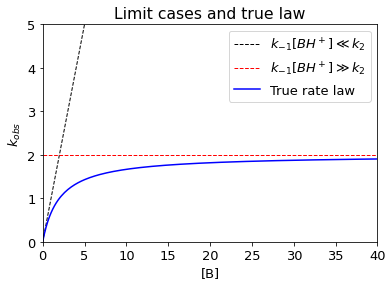

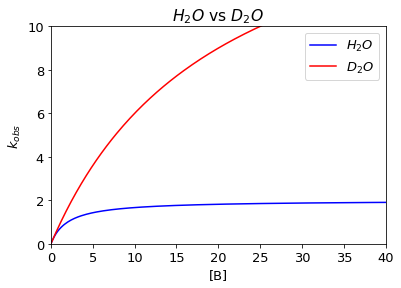

In [55]:
## here is the plot of derived equations with arbitrarily chosen rate constants and base concentrations

B = np.linspace(0, 40, 200)  # concetrations of a base
k1, k2, k_1 = 1, 0.5, 0.5
k1_D2O, k_1_D2O = 0.9, 0.05
B_BH_ratio = 2

k_obs_E2 = k1 * B
k_obs_E1cb = k1 * k2 * B_BH_ratio * np.ones_like(B) / k_1

overall_rate = k1 * k2 * B /  (k_1 * B / B_BH_ratio + k2)
overall_rate_D2O = k1_D2O * k2 * B /  (k_1_D2O * B / B_BH_ratio + k2)

plt.rcParams.update({'font.size': 13})

plt.plot(B, k_obs_E2, label='$k_{-1}[BH^+] \ll k_2$', ls='--', color='k', lw=1)
plt.plot(B, k_obs_E1cb, label='$k_{-1}[BH^+] \gg k_2$', ls='--', color='r', lw=1)
plt.plot(B, overall_rate, color='b', label='True rate law')
plt.xlabel('[B]')
plt.ylabel('$k_{obs}$')
plt.ylim(0, 5)
plt.xlim(0, 40)
plt.title("Limit cases and true law")
plt.legend()
plt.show()

plt.plot(B, overall_rate, color='b', label='$H_2O$')
plt.plot(B, overall_rate_D2O, color='r', label='$D_2O$')

plt.xlabel('[B]')
plt.ylabel('$k_{obs}$')
plt.ylim(0, 10)
plt.xlim(0, 40)
plt.title("$H_2O$ vs $D_2O$")
plt.legend()
plt.show()